In [1]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update({
        "text.usetex": True,              # If you want to use LaTeX fonts in text
        "font.family": "serif",           # IEEE uses Times New Roman-like fonts
        "font.size": 12,                   # General font size for IEEE format
        "axes.labelsize": 12,              # Axis labels font size
        "legend.fontsize": 11,             # Legend font size
        "xtick.labelsize": 11,             # X-axis tick labels font size
        "ytick.labelsize": 11,             # Y-axis tick labels font size
        "figure.figsize": (5, 5*0.8),
        "savefig.dpi": 900,               # DPI for high-quality PNG/JPEG
        "figure.dpi": 75,
    })

---
---
---

# BOXPLOT

In [2]:
df = pd.read_csv('10ma_FEAUTURES.csv')

X = df.drop(columns=["FatigInd"])
y = df["FatigInd"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X.shape, y.shape

((639, 8), (639,))

In [3]:
model_reglog = joblib.load('model_reglog.pkl')
model_svm = joblib.load('model_svm.pkl')
model_dtree = joblib.load('model_dtree.pkl')

In [4]:
#ACCURACY PRECISION RECACALL

In [5]:
df = {"valores": [], "modelo": [], "classe": [], "metrica": []}

for model in [model_reglog, model_svm, model_dtree]:
    for k in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.125, random_state=k*2)

        y_pred = model.predict(X_test)
        # Compute F1 score, precision, recall, and accuracy for each class separately
        precision = precision_score(y_test, y_pred, average=None)  # Precision for each class
        recall = recall_score(y_test, y_pred, average=None)  # Recall for each class
        accuracy = accuracy_score(y_test, y_pred)  # Accuracy (overall)

        classes = ["Low/Minimal", "Optimal", "Risk/Caution"]
        for classe in range(3):
            if str(model)[:3] == "Log":
                M = "Log. Reg."
            elif str(model)[:3] == "SVC":
                M = "SVM"
            else:
                M = "D. Tree"
            # precision
            df["valores"].append(precision[classe]*1)
            df["modelo"].append(M)
            df["classe"].append(classes[classe])
            df["metrica"].append("precision")

            # recall
            df["valores"].append(recall[classe]*1)
            df["modelo"].append(M)
            df["classe"].append(classes[classe])
            df["metrica"].append("recall")

            # f1-score
            df["valores"].append(2*precision[classe]*recall[classe] / (precision[classe] + recall[classe]))
            df["modelo"].append(M)
            df["classe"].append(classes[classe])
            df["metrica"].append("f1-score")

        # accuracy
        df["valores"].append(accuracy*1)
        df["modelo"].append(M)
        df["classe"].append("Overall")
        df["metrica"].append("accuracy")

df = pd.DataFrame(df)
df.head(3)

,valores,modelo,classe,metrica
0,0.791667,Log. Reg.,Low/Minimal,precision
1,0.678571,Log. Reg.,Low/Minimal,recall
2,0.730769,Log. Reg.,Low/Minimal,f1-score


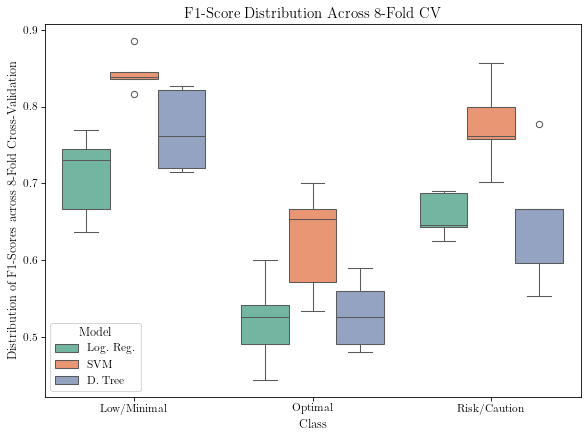

In [6]:
# Criar o gráfico de box plots agrupados
plt.figure(figsize=(8, 6))
sns.boxplot(x="classe", y="valores", hue="modelo", data=df[df["metrica"] == "f1-score"], palette="Set2")

# Adicionar título e rótulos
plt.xlabel("Class")
plt.ylabel("Distribution of F1-Scores across 8-Fold Cross-Validation")

# Exibir o gráfico
plt.legend(title="Model")
plt.title("F1-Score Distribution Across 8-Fold CV")
plt.tight_layout()
plt.savefig("assets/box_f1score.png", transparent=True)
plt.show()


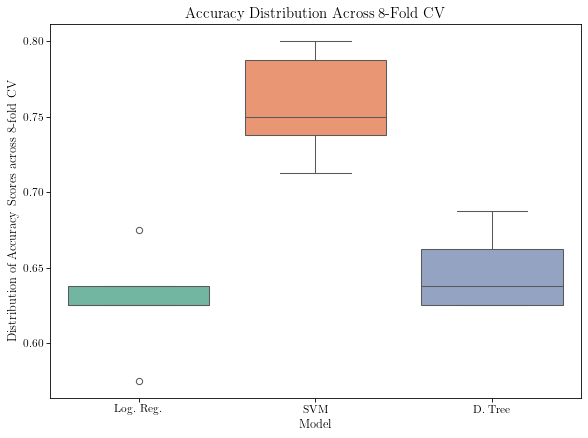

In [7]:
# Criar o gráfico de box plots agrupados
plt.figure(figsize=(8, 6))
sns.boxplot(x="modelo", y="valores", data=df[df["metrica"] == "accuracy"], hue="modelo", palette="Set2")

# Adicionar título e rótulos
plt.xlabel("Model")
plt.ylabel("Distribution of Accuracy Scores across 8-fold CV")

# Exibir o gráfico
plt.title("Accuracy Distribution Across 8-Fold CV")
plt.tight_layout()
plt.savefig("assets/box_accuracy.png", transparent=True)
plt.show()


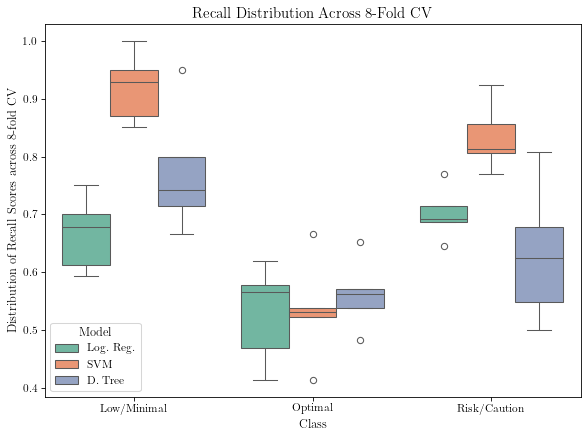

In [8]:
# Criar o gráfico de box plots agrupados
plt.figure(figsize=(8, 6))
sns.boxplot(x="classe", y="valores", hue="modelo", data=df[df["metrica"] == "recall"], palette="Set2")

# Adicionar título e rótulos
plt.xlabel("Class")
plt.ylabel("Distribution of Recall Scores across 8-fold CV")

# Exibir o gráfico
plt.legend(title="Model")
plt.title("Recall Distribution Across 8-Fold CV")
plt.tight_layout()
plt.savefig("assets/box_recall.png", transparent=True)
plt.show()


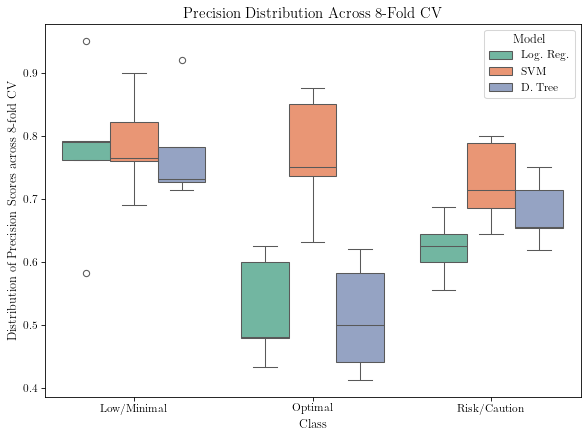

In [9]:
# Criar o gráfico de box plots agrupados
plt.figure(figsize=(8, 6))
sns.boxplot(x="classe", y="valores", hue="modelo", data=df[df["metrica"] == "precision"], palette="Set2")

# Adicionar título e rótulos
plt.xlabel("Class")
plt.ylabel("Distribution of Precision Scores across 8-fold CV")

# Exibir o gráfico
plt.legend(title="Model")
plt.title("Precision Distribution Across 8-Fold CV")
plt.tight_layout()
plt.savefig("assets/box_precision.png", transparent=True)
plt.show()


---
---
---

# PCA

In [10]:
df = pd.read_csv('10ma_FEAUTURES.csv')

X = df.drop(columns=["FatigInd"])
y = df["FatigInd"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.shape, X_test.shape

((511, 8), (128, 8))

In [11]:
model_reglog = joblib.load('model_reglog.pkl')
model_svm = joblib.load('model_svm.pkl')
model_dtree = joblib.load('model_dtree.pkl')

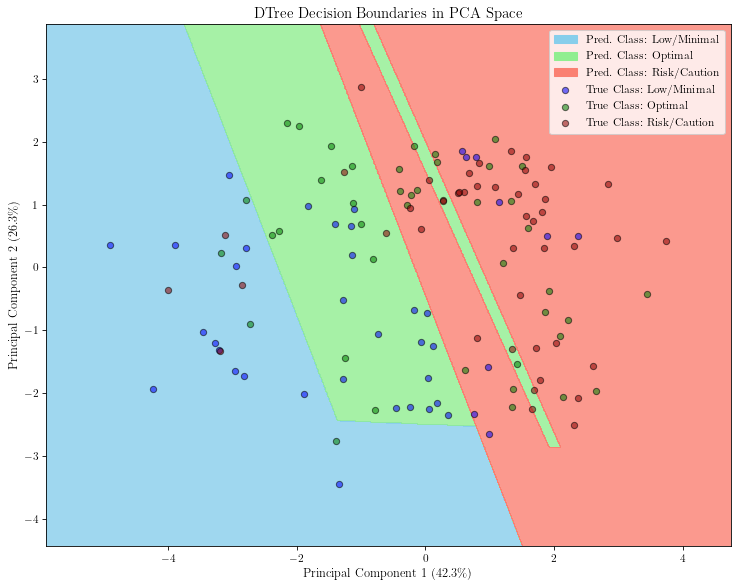

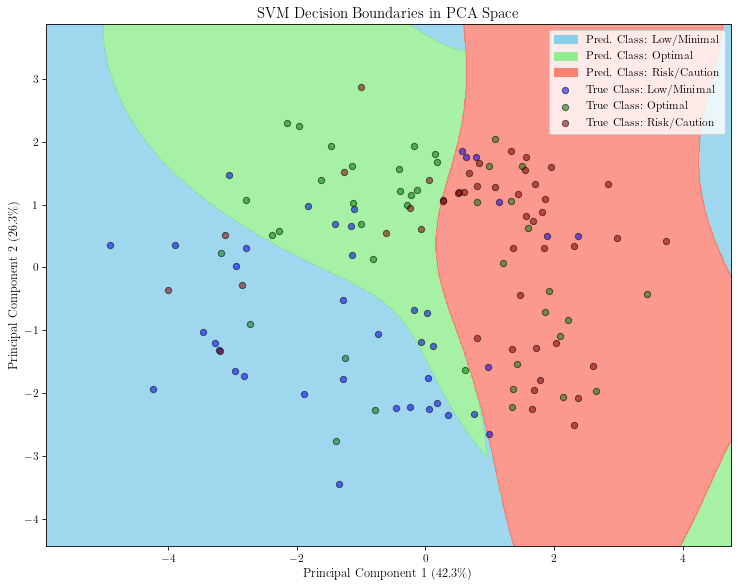

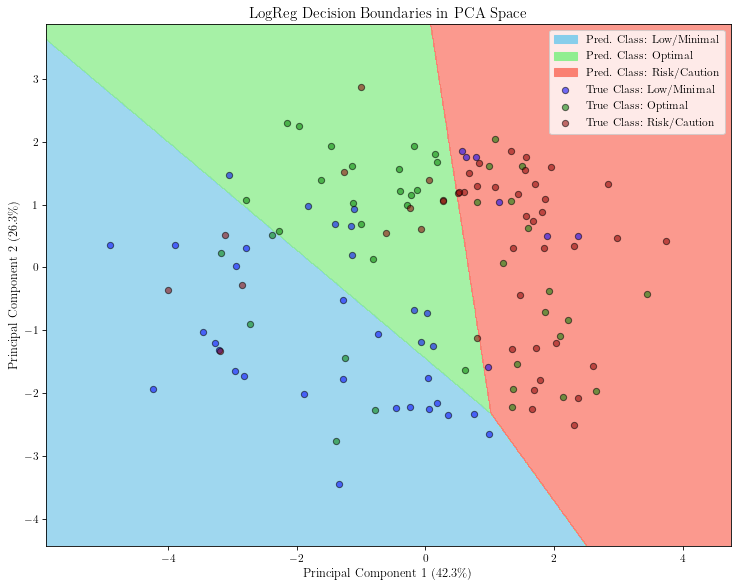

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import cm
import matplotlib.patches as mpatches

models = [model_dtree, model_svm, model_reglog]
names = ["pca_dtree", "pca_svm", "pca_reglog"]
titles = ["DTree Decision Boundaries in PCA Space",
          "SVM Decision Boundaries in PCA Space",
          "LogReg Decision Boundaries in PCA Space",
          ]


for i in range(3):
    MODEL = models[i]
    NAME = names[i]

    # Step 1: Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_test)

    # Step 2: Prepare for plotting
    # Assign unique colors to true labels
    unique_classes = np.unique(y_test)
    colors = cm.rainbow(np.linspace(0, 1, len(unique_classes)))
    class_color_map = {cls: color for cls, color in zip(unique_classes, colors)}
    class_color_map = {'Low/Minimal': "blue",
                    'Optimal': "green",
                    'Risk/Caution': "darkred"}

    # Step 1: Create a mesh grid in PCA space
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

    # Step 2: Transform grid points back to the original feature space
    grid_points_pca = np.c_[xx.ravel(), yy.ravel()]
    grid_points_original = pca.inverse_transform(grid_points_pca)

    # Step 3: Predict on the grid points
    Z = MODEL.predict(grid_points_original)
    Z = Z.reshape(xx.shape)
    from sklearn.preprocessing import LabelEncoder

    # Encode class labels into integers
    encoder = LabelEncoder()
    Z_numeric = encoder.fit_transform(Z.ravel())  # Flatten Z before encoding
    Z_numeric = Z_numeric.reshape(xx.shape)  # Reshape back to match the grid

    plt.figure(figsize=(10, 8))

    # Step 4: Plot decision boundaries
    from matplotlib.colors import ListedColormap
    colors = ['skyblue', 'lightgreen', 'salmon']  # Red, Green, Blue (for levels 0, 1, 2)
    cmap = ListedColormap(colors)

    # Create the contour plot with the custom colormap
    plt.contourf(xx, yy, Z_numeric, alpha=0.8, cmap=cmap)

    # Overlay the original scatter plot
    for true_class in unique_classes:
            idx = (y_test == true_class)
            plt.scatter(
                X_pca[idx, 0], X_pca[idx, 1],
                c=[class_color_map[true_class]],
                label=f"True Class: {true_class}",
                edgecolor='k',
                alpha=0.55
            )

    legend_labels = ['Low/Minimal', 'Optimal', 'Risk/Caution']
    patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(colors))]

    # Step 5: Finalize the plot

    legend = plt.legend()  # This is for the regular legend with normal labels

    # Combine the handles of the regular plot and the custom patches
    handles, labels = plt.gca().get_legend_handles_labels()
    combined_handles = patches + handles
    combined_labels = ['Pred. Class: Low/Minimal', 'Pred. Class: Optimal', 'Pred. Class: Risk/Caution'] + labels

    # Create a single combined legend
    plt.legend(handles=combined_handles, labels=combined_labels)
    plt.title(titles[i])
    plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}\%)")
    plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}\%)")
    plt.tight_layout()
    plt.savefig(f"assets/{NAME}.png", transparent=True)
    #print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.2f}")
    plt.show()
